## Fraude de cartão de crédito

### Fonte de Dados:

- Os pagamentos digitais estão evoluindo, mas os criminosos cibernéticos também.

- De acordo com o Data Breach Index, mais de 5 milhões de registros são roubados diariamente, uma estatística preocupante que mostra - a fraude ainda é muito comum tanto para pagamentos do tipo Cartão-Presente quanto Cartão-Não Presente.

- No mundo digital de hoje, onde trilhões de transações com cartões acontecem por dia, a detecção de fraudes é um desafio.


### Explicação do das variáveis:

* **distancefromhome** - a distância de casa onde a transação aconteceu.

* **distancefromlast_transaction** - a distância da última transação aconteceu.

* **ratiotomedianpurchaseprice** - Razão da transação do preço de compra para o preço de compra mediano.

* **repeat_retailer** - É a transação que aconteceu do mesmo varejista.

* **used_chip** - É a transação através de chip (cartão de crédito).

* **usedpinnumber** - A transação aconteceu usando o número PIN.

* **online_order** - A transação é um pedido online.

* **fraude** - A transação é fraudulenta.

In [1]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report #métricas de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

In [2]:
dados_path = './card_transdata.csv'

dados = pd.read_csv(dados_path)

In [3]:
dados

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Base está ok!

# Análise exploratória

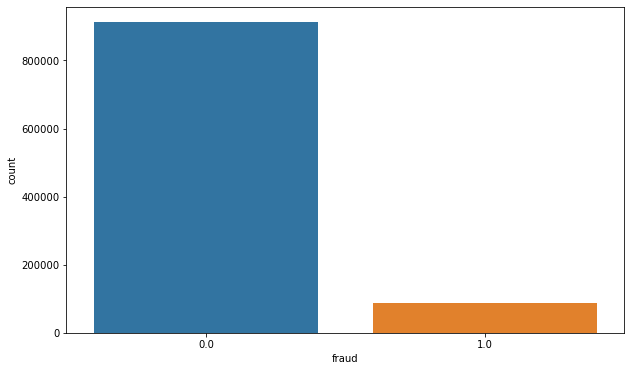

In [5]:
plt.figure(figsize=(10,6))

sns.countplot(data=dados, x='fraud')

plt.show()

In [6]:
print(dados.fraud.value_counts(normalize=True)*100)

0.0    91.2597
1.0     8.7403
Name: fraud, dtype: float64


**Desequilíbrio na base**

In [7]:
dados.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
dados.groupby('fraud').describe().T

fraud                                           0.0           1.0
distance_from_home             count  912597.000000  87403.000000
                               mean       22.832976     66.261876
                               std        52.828655    134.391608
                               min         0.004874      0.025847
                               25%         3.828942      4.585729
                               50%         9.673847     15.454219
                               75%        24.158057    101.110104
                               max      8777.136420  10632.723672
distance_from_last_transaction count  912597.000000  87403.000000
                               mean        4.301391     12.712185
                               std        22.472359     47.997697
                               min         0.000118      0.000407
                               25%         0.293859      0.328199
                               50%         0.985074      1.157631
                               75%         3.268578      4.598504
                               max     11851.104565   2160.499922
ratio_to_median_purchase_price count  912597.000000  87403.000000
                               mean        1.423642      6.006323
                               std         1.946152      5.564320
                               min         0.004399      0.011966
                               25%         0.449768      3.500270
                               50%         0.913950      5.071294
                               75%         1.788918      7.331222
                               max       267.802942    266.689692
repeat_retailer                count  912597.000000  87403.000000
                               mean        0.881672      0.880119
                               std         0.322997      0.324825
                               min         0.000000      0.000000
                               25%         1.000000      1.000000
                               50%         1.000000      1.000000
                               75%         1.000000      1.000000
                               max         1.000000      1.000000
used_chip                      count  912597.000000  87403.000000
                               mean        0.359402      0.256399
                               std         0.479825      0.436647
                               min         0.000000      0.000000
                               25%         0.000000      0.000000
                               50%         0.000000      0.000000
                               75%         1.000000      1.000000
                               max         1.000000      1.000000
used_pin_number                count  912597.000000  87403.000000
                               mean        0.109944      0.003123
                               std         0.312821      0.055801
                               min         0.000000      0.000000
                               25%         0.000000      0.000000
                               50%         0.000000      0.000000
                               75%         0.000000      0.000000
                               max         1.000000      1.000000
online_order                   count  912597.000000  87403.000000
                               mean        0.622225      0.946318
                               std         0.484831      0.225391
                               min         0.000000      0.000000
                               25%         0.000000      1.000000
                               50%         1.000000      1.000000
                               75%         1.000000      1.000000
                               max         1.000000      1.000000

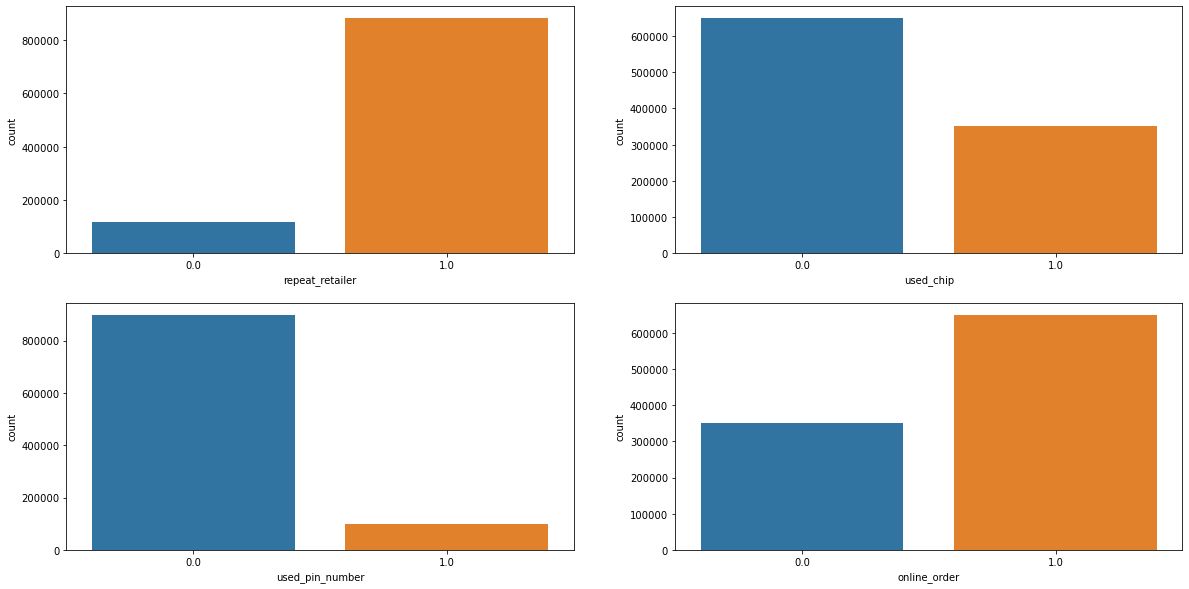

In [9]:
fig,ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))

sns.countplot(data=dados, x='repeat_retailer', ax=ax[0,0])
sns.countplot(data=dados, x='used_chip', ax=ax[0,1])
sns.countplot(data=dados, x='used_pin_number', ax=ax[1,0])
sns.countplot(data=dados, x='online_order', ax=ax[1,1])


plt.show()

Primeiros insights, transações fraudulentas em geral são:

    - Mais distantes da casa e do local da última transação;

    - Ocorrem preferencialmente via internet;
    
    - Tem preços mais elevados com relação à mediana do valor de compra do usuário;

    - Não usam PIN ou cartão físico;

    - Ocorrem em estabelecimentos "repetidos".

In [10]:
num_cols = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']

fig,ax = plt.subplots(ncols=3, figsize=(30,8))

for col in num_cols[:1]:
    sns.boxplot(data=dados, x=col, ax=ax[num_cols.index(col)])

    ax[num_cols.index(col)].set_xlim(0,dados[col].max()/10)

plt.show()

KeyboardInterrupt: 

In [ ]:
dados['ratio_to_median_purchase_price'].describe()

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64

Distribuição muito assimétrica, os outliers são provavelmente os casos de fraude